# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## MODELING LIBRARIES

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# READ THE FILE

In [3]:
df = pd.read_csv(r'C:\Workbook\Funds\mutual_funds.csv')

## SHAPE OF DF

In [4]:
df.shape

(17839, 87)

## EXPLORATORY DATA ANALYSIS

### HEAD

In [5]:
df.head(5)

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_type,size_type,...,fund_return_2010_q2,fund_return_2010_q1,fund_alpha_5years,fund_alpha_10years,fund_beta_5years,fund_beta_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,2007-07-29,World Allocation,3.0,3.0,3.0,Blend,Large,...,-2.53,2.23,-2.86,-3.86,1.05,0.93,10.39,8.67,0.33,0.24
1,AAADX,Aberdeen Income Builder Fund Class A,Aberdeen,2011-12-29,Allocation - 50% to 70% Equity,4.0,5.0,5.0,Blend,Large,...,NaN,NaN,-0.30,-0.15,1.36,1.45,10.21,11.70,0.74,0.89
2,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,1999-10-28,Large Growth,3.0,3.0,4.0,Growth,Large,...,-14.29,4.09,2.92,0.77,1.04,1.08,16.49,15.40,0.88,0.93
3,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,2000-07-31,Allocation - 70% to 85% Equity,4.0,4.0,3.0,Blend,Large,...,-8.13,3.92,-0.78,-0.48,1.39,1.37,12.35,11.44,0.61,0.73
4,AAANX,Horizon Active Asset Allocation Fund Investor ...,Horizon Investments,2012-01-30,Tactical Allocation,3.0,4.0,5.0,Blend,Large,...,NaN,NaN,-4.38,NaN,1.67,NaN,15.06,NaN,0.37,NaN


### TAIL

In [6]:
df.tail(5)

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_type,size_type,...,fund_return_2010_q2,fund_return_2010_q1,fund_alpha_5years,fund_alpha_10years,fund_beta_5years,fund_beta_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years
17834,ZSCIX,Zacks Small-Cap Core Fund Institutional Class,Zacks Funds,2014-02-27,Small Blend,2.0,2.0,3.0,Growth,Small,...,NaN,NaN,-8.82,NaN,1.15,NaN,19.76,NaN,0.20,NaN
17835,ZVGIX,Zevenbergen Genea Fund Institutional Class,Zevenbergen Capital Investments,2015-08-30,Large Growth,5.0,5.0,5.0,Growth,Large,...,NaN,NaN,15.82,NaN,1.44,NaN,27.35,NaN,1.16,NaN
17836,ZVGNX,Zevenbergen Genea Fund Investor Class,Zevenbergen Capital Investments,2015-08-30,Large Growth,5.0,5.0,5.0,Growth,Large,...,NaN,NaN,15.55,NaN,1.44,NaN,27.32,NaN,1.15,NaN
17837,ZVNBX,Zevenbergen Growth Fund Investor Class,Zevenbergen Capital Investments,2015-08-30,Large Growth,5.0,5.0,5.0,Growth,Large,...,NaN,NaN,12.56,NaN,1.28,NaN,23.75,NaN,1.12,NaN
17838,ZVNIX,Zevenbergen Growth Fund Institutional Class,Zevenbergen Capital Investments,2015-08-30,Large Growth,5.0,5.0,5.0,Growth,Large,...,NaN,NaN,12.81,NaN,1.28,NaN,23.77,NaN,1.13,NaN


### REMOVE COLUMNS

In [7]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'category', 'rating', 'return_rating', 'risk_rating', 'investment_type',
       'size_type', 'currency', 'fund_net_annual_expense_ratio', 'asset_cash',
       'asset_stocks', 'asset_bonds', 'asset_others', 'asset_preferred',
       'asset_convertable', 'price_earnings_ratio', 'price_book_ratio',
       'price_sales_ratio', 'price_cashflow_ratio', 'median_market_cap',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'fund_return_5years', 'fund_return_10years',
       'fund_return_2020_q3', 'fund_return_2020_q2', 'fund_return_2020_q1',
       'fund_return_2019_q4', 'fund_return_2019_q3', 'fund_return_2019_q2',
       'fund_return_2019_q1', 'fund_return_201

### DESCRIBE

In [9]:
df[['price_earnings_ratio','price_book_ratio','price_sales_ratio','fund_return_5years', 'fund_return_10years','fund_standard_deviation_5years','fund_standard_deviation_10years','fund_sharpe_ratio_5years','fund_sharpe_ratio_10years']].describe()

,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_return_5years,fund_return_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years
count,17839.000000,17832.000000,17837.000000,15948.000000,12299.000000,15976.000000,12316.000000,15976.000000,12316.000000
mean,22.463181,2.986991,2.193238,6.666904,8.039385,14.372301,13.784726,0.455725,0.615506
std,7.341037,1.977699,9.718611,5.177577,4.249339,5.081421,4.413204,0.299869,0.258760
min,1.470000,0.130000,0.050000,-24.860000,-24.700000,1.350000,1.750000,-1.370000,-1.370000
25%,17.880000,1.830000,1.180000,3.730000,5.330000,11.557500,11.650000,0.270000,0.450000
50%,21.430000,2.380000,1.600000,6.100000,7.820000,14.680000,14.290000,0.480000,0.630000
75%,25.590000,3.380000,2.320000,9.040000,10.640000,17.120000,16.170000,0.650000,0.800000
max,59.990000,17.350000,714.290000,36.070000,32.790000,60.390000,53.910000,1.700000,1.460000


### INFO / COLUMNS/ NUMBER OF FEATURES

In [10]:
df.columns

Index(['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date',
       'category', 'rating', 'return_rating', 'risk_rating', 'investment_type',
       'size_type', 'currency', 'fund_net_annual_expense_ratio', 'asset_cash',
       'asset_stocks', 'asset_bonds', 'asset_others', 'asset_preferred',
       'asset_convertable', 'price_earnings_ratio', 'price_book_ratio',
       'price_sales_ratio', 'price_cashflow_ratio', 'median_market_cap',
       'sector_basic_materials', 'sector_consumer_cyclical',
       'sector_financial_services', 'sector_real_estate',
       'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities',
       'sector_communication_services', 'sector_energy', 'sector_industrials',
       'sector_technology', 'fund_return_5years', 'fund_return_10years',
       'fund_return_2020_q3', 'fund_return_2020_q2', 'fund_return_2020_q1',
       'fund_return_2019_q4', 'fund_return_2019_q3', 'fund_return_2019_q2',
       'fund_return_2019_q1', 'fund_return_201

In [11]:
df.columns.value_counts().sum()

87

### TOTAL NUMBER OF MISSING VALUES

In [12]:
df.isna().sum().sum()

219420

## WHERE ARE THE MISSING VALUES

In [13]:
df.isna().sum()

fund_symbol                           0
fund_extended_name                    0
fund_family                           0
inception_date                        0
category                              2
                                   ... 
fund_beta_10years                  5523
fund_standard_deviation_5years     1863
fund_standard_deviation_10years    5523
fund_sharpe_ratio_5years           1863
fund_sharpe_ratio_10years          5523
Length: 87, dtype: int64

### REMOVE MISSING VALUES

In [14]:
df.dropna(inplace = True)

In [15]:
df.isna().sum().sum()

0

In [16]:
df.shape

(8080, 87)

In [17]:
df.reset_index(drop = True, inplace = True)

### GROUP BY SHARPE RATIO

In [18]:
#CLASSIFICATION ON THE LEFT, NUMERICAL AS COLUMNS
df.groupby(['fund_family','investment_type'])[['fund_return_10years','fund_sharpe_ratio_10years','fund_standard_deviation_10years']].mean().sort_values(by ='fund_sharpe_ratio_10years', ascending = False)

,,fund_return_10years,fund_sharpe_ratio_10years,fund_standard_deviation_10years
fund_family,investment_type,,,
PIMCO,Value,6.426667,1.346667,4.218333
Akre,Growth,16.620000,1.290000,12.050000
Advisors Preferred,Blend,6.980000,1.240000,5.020000
Edgewood,Growth,18.020000,1.210000,14.100000
Shelton Capital Management,Growth,18.390000,1.150000,15.205000
...,...,...,...,...
Absolute Strategies,Blend,-0.390000,-0.220000,4.130000
U.S. Global Investors,Value,-6.190000,-0.230000,20.630000
Hussman Funds,Blend,-1.620000,-0.253333,6.226667


In [19]:
best_funds = df.groupby(['fund_family'])[['fund_return_10years','price_book_ratio','price_earnings_ratio']].mean().sort_values(by ='fund_return_10years', ascending = False)[:10]
best_funds

,fund_return_10years,price_book_ratio,price_earnings_ratio
fund_family,,,
Berkshire,20.760000,17.350000,42.830000
Edgewood,18.020000,9.710000,42.370000
Akre,16.620000,7.500000,39.310000
Investment House Funds,16.260000,9.440000,37.440000
DF Dent Funds,15.350000,6.180000,40.020000
Baron Capital Group,15.006667,6.266667,38.805556
Frost Funds,14.830000,9.300000,36.580000
Lisanti SmallCap,14.610000,5.320000,29.670000
Hood River Capital Management,14.580000,4.290000,33.430000


In [20]:
a=df['fund_return_10years']
stda = np.std(a)
b = df['price_book_ratio']
stdb = np.std(b)
c = df['price_earnings_ratio']
stdc = np.std(c)

print("The standard deviation for the Fund return 10 years, PB ratio and PE ratio are %.2f %.2f %.2f" %(stda,stdb,stdc))

The standard deviation for the Fund return 10 years, PB ratio and PE ratio are 4.24 2.10 7.16


## NAME OF UNIQUE FUND FAMILY

In [21]:
df['fund_family'].unique()

array(['DWS', 'Thrivent Funds', 'American Century Investments',
       'American Funds', 'Putnam', 'American Beacon', 'Invesco', 'Alger',
       'Aberdeen', 'AllianceBernstein', 'Columbia', 'AMG Funds',
       'Azzad Fund', 'Allianz Global Investors', 'North Square',
       'Acadian Funds', 'Yorktown Funds', 'Applied Finance Advisors',
       'PGIM Funds (Prudential)', 'Cavanal Hill funds', 'AQR Funds',
       'Akre', 'Lord Abbett', 'Firsthand Funds', 'Amana', 'AlphaMark',
       'Pioneer Investments', 'Artisan', 'Appleseed Fund', 'AAM', 'LKCM',
       'Archer', 'Ariel Investments', 'Nuveen', 'Lisanti SmallCap',
       'Absolute Strategies', 'Astor', 'American Trust', 'Aquila', 'Auer',
       'Auxier Funds', 'Ave Maria Mutual Funds', 'BNY Mellon',
       'CIBC Private Wealth Management', 'BlackRock',
       'Sterling Capital Funds', 'Brown Advisory Funds',
       'Baron Capital Group', 'Northern Funds', 'BBH',
       'Brown Capital Management', 'BeeHive',
       'Franklin Templeton Inv

### NUMBER OF UNIQUE FUND MANAGERS

In [22]:
df['fund_family'].nunique()

374

## CORRELATION OF FUND RETURN 10 YEARS SORTED BY HIGHEST CORRELATION

In [24]:
corr = df.corr()[['fund_return_10years','price_earnings_ratio','price_book_ratio','price_sales_ratio','fund_standard_deviation_10years','fund_sharpe_ratio_10years']]
cor = corr.sort_values(by = 'fund_return_10years', ascending = False)[:15]
cor

,fund_return_10years,price_earnings_ratio,price_book_ratio,price_sales_ratio,fund_standard_deviation_10years,fund_sharpe_ratio_10years
fund_return_10years,1.000000,0.604496,0.682941,0.500849,0.105149,0.827335
fund_sharpe_ratio_10years,0.827335,0.554843,0.594349,0.428488,-0.319714,1.000000
fund_return_5years,0.787125,0.706604,0.771059,0.631253,0.193044,0.673364
fund_return_2018_q3,0.721790,0.378690,0.471626,0.233430,-0.053480,0.628433
fund_sharpe_ratio_5years,0.702878,0.685545,0.710592,0.560890,-0.140176,0.824217
price_book_ratio,0.682941,0.859604,1.000000,0.769247,0.092177,0.594349
fund_return_2014_q4,0.641841,0.213108,0.212702,0.219808,-0.009410,0.518103
fund_return_2013_q4,0.641481,0.174205,0.307952,0.002582,0.209147,0.400115
fund_return_2015_q4,0.638567,0.393832,0.433694,0.417890,0.182854,0.456722
fund_return_2019_q1,0.633769,0.479271,0.503696,0.472178,0.595323,0.267581


## CORRELATION MATRIX

<AxesSubplot:>

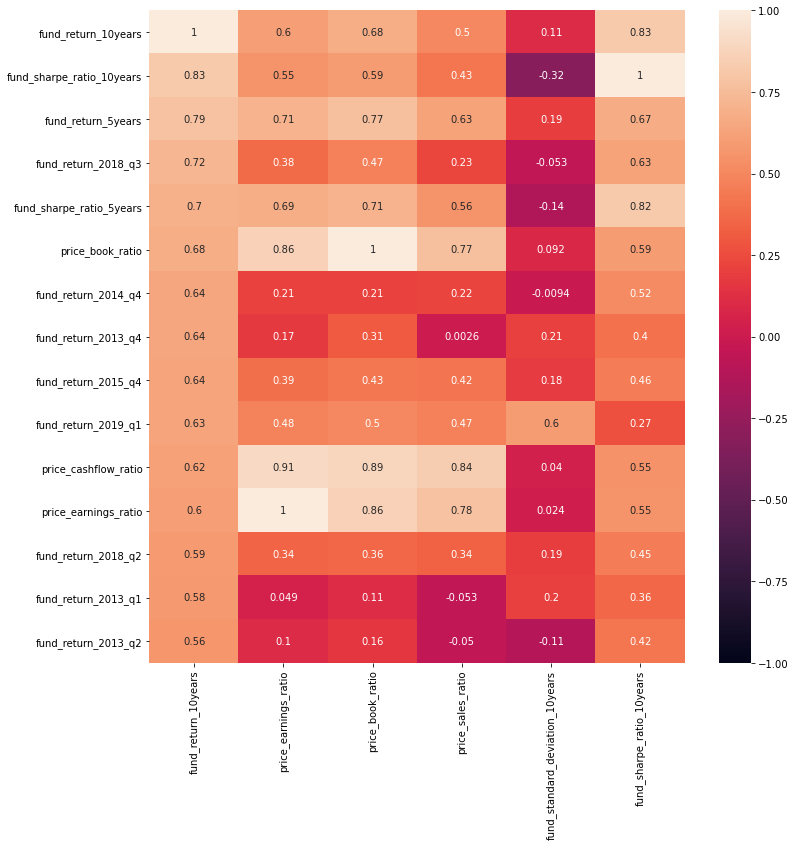

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(cor, annot= True, vmin=-1, vmax= 1)

## VIZUALISATION

### LIBRARIES

In [26]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import cufflinks as cf

In [27]:
cf.go_offline()

### LINE DISTRIBUTION OF FUNDS RETURNS 10 YEARS

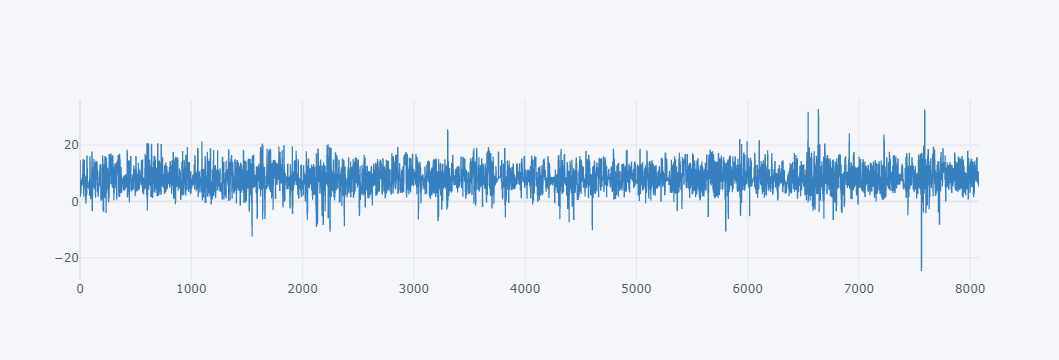

In [37]:
df['fund_return_10years'].iplot(color = "blue")

### COMPARISON BETWEEN FUND RETURN AND PE

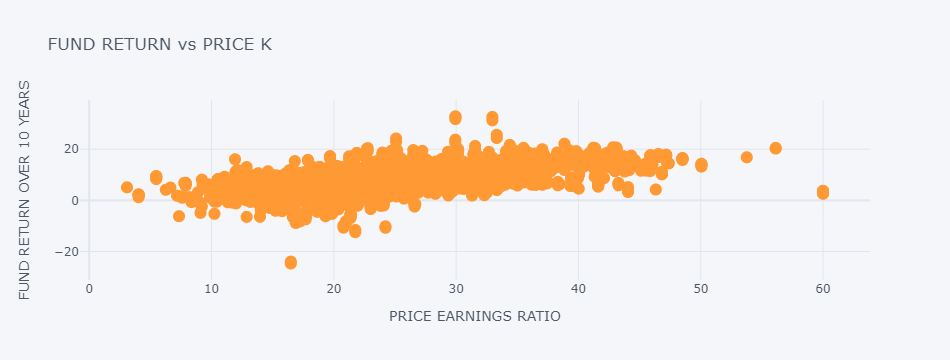

In [29]:
df.iplot(kind = 'scatter', x = 'price_earnings_ratio', y = 'fund_return_10years', mode = 'markers', xTitle='PRICE EARNINGS RATIO',yTitle = 'FUND RETURN OVER 10 YEARS',title = 'FUND RETURN vs PRICE K' )

### SPREAD BETWEEN FUND RETURNS AND PE

C:\Users\Matt\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\Matt\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



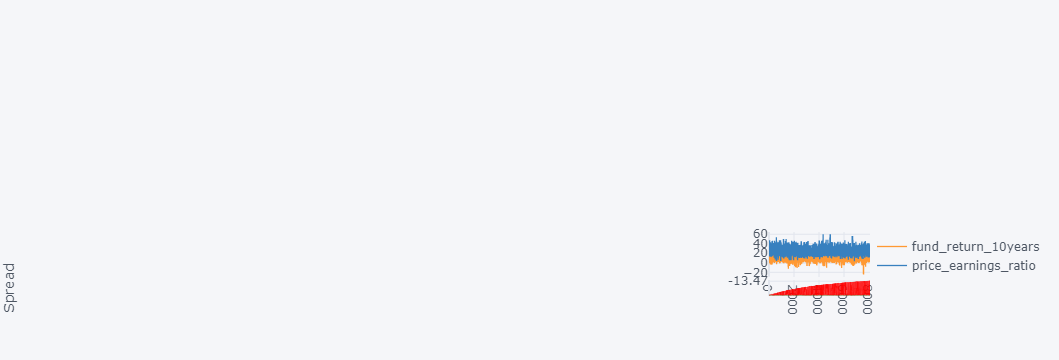

In [30]:
df[['fund_return_10years','price_earnings_ratio']].iplot(kind = "spread")

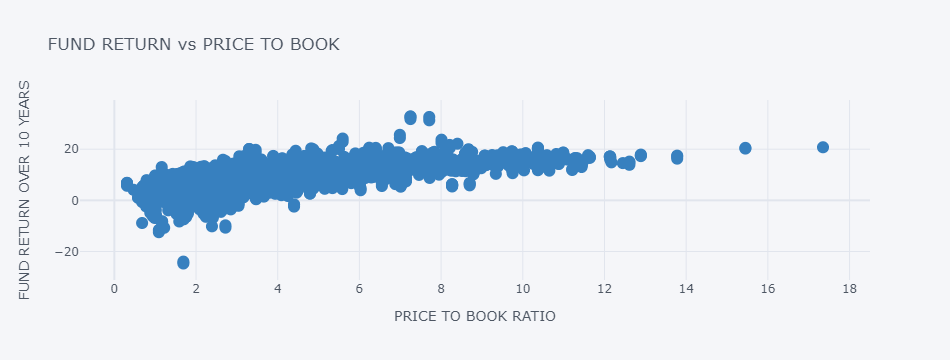

In [36]:
df.iplot(kind = 'scatter', x = 'price_book_ratio', y = 'fund_return_10years', mode ='markers',xTitle='PRICE TO BOOK RATIO',yTitle = 'FUND RETURN OVER 10 YEARS',title = 'FUND RETURN vs PRICE TO BOOK', color = 'blue')

### DISTRIBUTION OF RETURNS

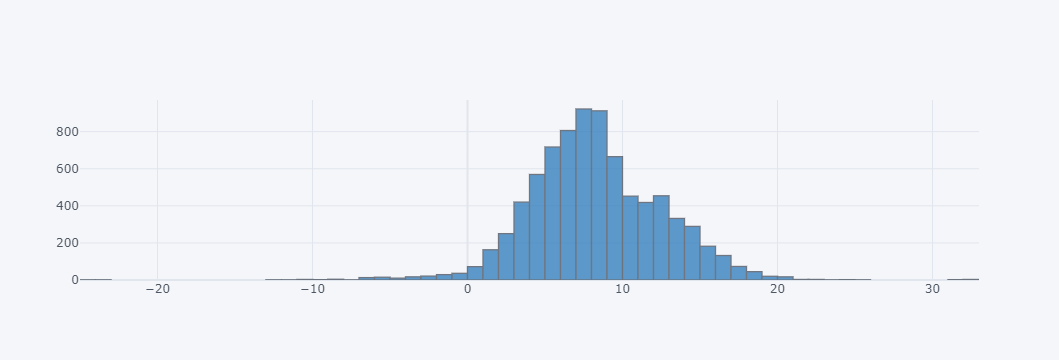

In [40]:
df['fund_return_10years'].iplot(kind = 'hist', bins = 100, color = 'blue')

In [62]:
bf = df[df['price_book_ratio'] == 7.25]
bf = bf[['fund_extended_name','fund_symbol','fund_return_10years','price_book_ratio','price_earnings_ratio']].max()
bf = pd.DataFrame(bf)
bf

,0
fund_extended_name,Rydex NASDAQ-100 2x Strategy Fund Class H
fund_symbol,RYVYX
fund_return_10years,32.79
price_book_ratio,7.25
price_earnings_ratio,29.94


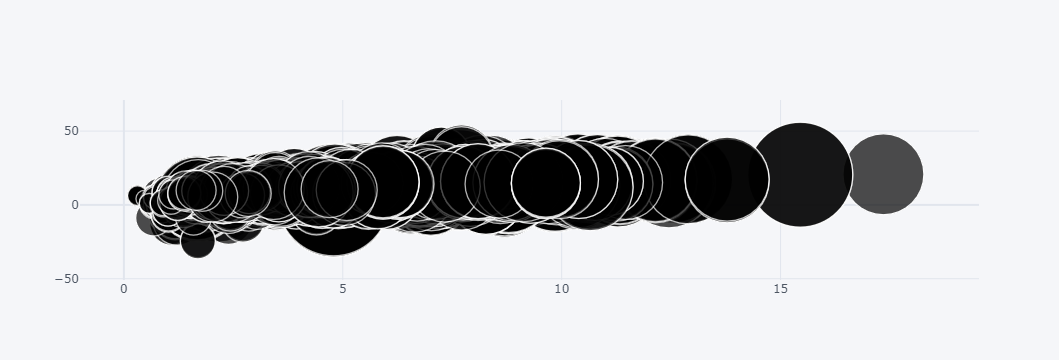

In [63]:
df.iplot(kind = 'bubble', x = 'price_book_ratio', y ='fund_return_10years',size ='price_earnings_ratio')

## CLASSIFICATION OF FUNDS BY RETURN 10 YEARS

In [64]:
a = df['fund_return_10years']

In [65]:
def funds(a):
    if a > 15:
        funds = 1
    elif a > 10 and a <= 15:
        funds = 2
    elif a > 5 and a <= 10:
        funds = 3
    else:
        funds = 4
    return funds

In [66]:
df['funds_ranking'] = 0

In [67]:
for i in range(len(df)):
   df['funds_ranking'][i] = funds(df['fund_return_10years'][i])

In [68]:
df['funds_ranking'].sample(5)

3670    2
656     2
4544    3
4424    3
5374    3
Name: funds_ranking, dtype: int64

In [69]:
df

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_type,size_type,...,fund_return_2010_q1,fund_alpha_5years,fund_alpha_10years,fund_beta_5years,fund_beta_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,funds_ranking
0,AAAAX,DWS RREEF Real Assets Fund - Class A,DWS,2007-07-29,World Allocation,3.0,3.0,3.0,Blend,Large,...,2.23,-2.86,-3.86,1.05,0.93,10.39,8.67,0.33,0.24,4
1,AAAGX,Thrivent Large Cap Growth Fund Class A,Thrivent Funds,1999-10-28,Large Growth,3.0,3.0,4.0,Growth,Large,...,4.09,2.92,0.77,1.04,1.08,16.49,15.40,0.88,0.93,2
2,AAAIX,American Century Strategic Allocation: Aggress...,American Century Investments,2000-07-31,Allocation - 70% to 85% Equity,4.0,4.0,3.0,Blend,Large,...,3.92,-0.78,-0.48,1.39,1.37,12.35,11.44,0.61,0.73,3
3,AAAPX,DWS RREEF Real Assets Fund - Class C,DWS,2007-07-29,World Allocation,2.0,2.0,3.0,Blend,Large,...,2.00,-3.60,-4.61,1.04,0.92,10.36,8.65,0.25,0.16,4
4,AAARX,American Century Strategic Allocation: Aggress...,American Century Investments,2005-03-30,Allocation - 70% to 85% Equity,3.0,4.0,3.0,Blend,Large,...,3.81,-1.49,-1.16,1.39,1.37,12.36,11.41,0.55,0.67,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8075,WWSIX,TETON Westwood SmallCap Equity Fund Class Inst...,Teton Westwood Funds,2008-01-10,Small Blend,2.0,3.0,4.0,Blend,Small,...,10.00,-6.31,-7.02,1.31,1.29,21.89,19.70,0.37,0.46,3
8076,WWWEX,Kinetics Global No Load Class,Kinetics,1999-12-30,World Small/Mid Stock,3.0,3.0,3.0,Growth,Medium,...,5.61,5.04,2.73,0.71,0.83,17.13,16.47,0.46,0.36,3
8077,WWWFX,Kinetics Internet Fund No Load Class,Kinetics,1996-10-20,Large Growth,1.0,1.0,5.0,Growth,Large,...,5.89,0.93,-1.03,0.86,0.97,20.39,17.85,0.51,0.63,2
8078,YACKX,AMG Yacktman Fund Class I,AMG Funds,1992-07-05,Large Value,5.0,5.0,1.0,Value,Large,...,5.91,-0.53,0.01,0.71,0.73,11.32,10.49,0.64,0.87,3


In [70]:
df[(df['funds_ranking'] <=2) & (df['price_earnings_ratio']<=15)].sort_values(by='fund_return_10years',ascending = False ).head()

,fund_symbol,fund_extended_name,fund_family,inception_date,category,rating,return_rating,risk_rating,investment_type,size_type,...,fund_return_2010_q1,fund_alpha_5years,fund_alpha_10years,fund_beta_5years,fund_beta_10years,fund_standard_deviation_5years,fund_standard_deviation_10years,fund_sharpe_ratio_5years,fund_sharpe_ratio_10years,funds_ranking
1125,DCGTX,Jackson Square SMID-Cap Growth Fund IS Class,Jackson Square,2003-11-30,Mid-Cap Growth,5.0,5.0,4.0,Growth,Medium,...,11.83,4.70,2.38,1.12,1.06,19.19,16.66,0.88,0.94,1
2969,HJPSX,Hennessy Japan Small Cap Fund Investor Class,Hennessy,2007-08-30,Japan Stock,4.0,4.0,4.0,Blend,Small,...,10.31,7.76,10.44,0.77,0.58,14.82,14.02,0.73,0.90,2
5426,OSMYX,Invesco International Small-Mid Company Fund C...,Invesco,2005-09-06,Foreign Small/Mid Growth,5.0,5.0,2.0,Growth,Medium,...,4.47,6.95,8.43,0.94,0.85,15.39,14.54,0.70,0.80,2
5423,OSMAX,Invesco International Small-Mid Company Fund C...,Invesco,1997-11-16,Foreign Small/Mid Growth,5.0,5.0,2.0,Growth,Medium,...,4.39,6.70,8.14,0.94,0.85,15.39,14.54,0.68,0.78,2
4715,MMCFX,AMG Managers Emerging Opportunities Fund Class N,AMG Funds,1994-06-29,Small Growth,2.0,2.0,5.0,Growth,Small,...,7.53,-3.20,-3.15,1.27,1.22,21.65,19.56,0.50,0.62,2


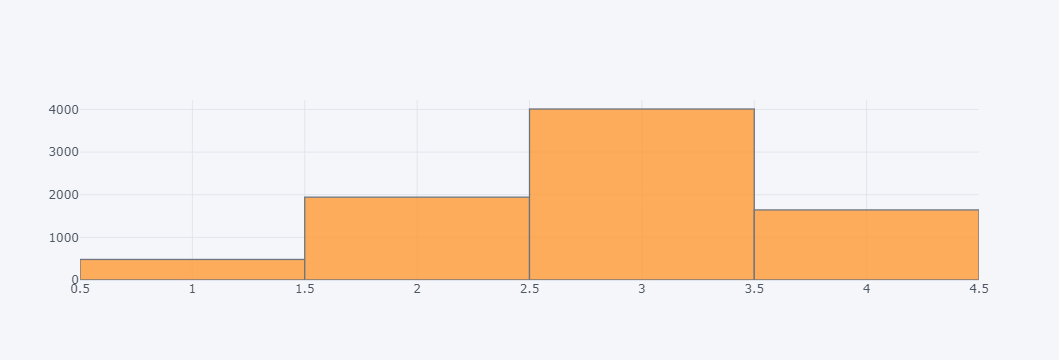

In [71]:
df['funds_ranking'].iplot(kind = 'hist')

### FUNDS RANKING

In [88]:
#df.column.value_counts --> Serie
fr = df.funds_ranking.value_counts()
fr = pd.DataFrame(fr)
fr

,funds_ranking
3,4011
2,1943
4,1644
1,482
